In [8]:
import pandas as pd 
import numpy as np
import networkx as nx
#from NetworkxD3 import simpleNetworkx
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Auditions.db.comp.csv', encoding="latin-1")
df.head()

,Name,n_poste,Level,Section,Role,status,year,institutions,ID,X,X.1,Id.author.no
0,Philippe DESSUS,193,PR,NaN,NaN,interne,2017,NaN,80526470,NaN,NaN,NaN
1,A Belhadjin,20,NaN,NaN,NaN,interne,2020,CY Cergy Paris Université,11317022X,NaN,NaN,NaN
2,A Bretegnier,62,NaN,NaN,NaN,externe,2020,NaN,70549923,NaN,NaN,NaN
3,A evin,4279,NaN,NaN,NaN,externe,2020,NaN,159017920,NaN,NaN,NaN
4,A Gombert,4647,NaN,NaN,NaN,externe,2020,NaN,6993696X,NaN,NaN,NaN


In [10]:
df.shape

(2430, 12)

In [11]:
inter2017 = df.query("status == 'interne' &  year== 2017")
exter2017 = df.query("status == 'externe' &  year== 2017")
inter2018 = df.query("status == 'interne' &  year== 2018")
exter2018 = df.query("status == 'externe' &  year== 2018")
inter2019 = df.query("status == 'interne' &  year== 2019")
exter2019 = df.query("status == 'externe' &  year== 2019")
inter2020 = df.query("status == 'interne' &  year== 2020")
exter2020 = df.query("status == 'externe' &  year== 2020")

In [12]:
exter2017

,Name,n_poste,Level,Section,Role,status,year,institutions,ID,X,X.1,Id.author.no
19,Abdelkarim ZAID,4283,PR,70,NaN,externe,2017,ESPE LNF,82292477,NaN,NaN,NaN
37,Alain JEAN,544,MCF,70,NaN,externe,2017,ESPE Languedoc Roussillon,156891824,NaN,NaN,NaN
45,Alain VULBEAU,4061,PU,70,NaN,externe,2017,Paris NAnterre,28820649,NaN,NaN,NaN
48,Alain VULBEAU,4372,PR,70,NaN,externe,2017,Paris NAnterre,28820649,NaN,NaN,NaN
68,Anne-Claire Husser,4265,MCF,NaN,NaN,externe,2017,NaN,135608104,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2411,Xavier RIONDET,4501,MCF,17,NaN,externe,2017,NAncy,153008377,NaN,NaN,NaN
2416,Y Bassaglia,4314,MCF,NaN,NaN,externe,2017,UPEC,NaN,NaN,NaN,050500503
2419,Yann MERCIER-BRUNEL,4421,MCF,70,NaN,externe,2017,Orléans,147187877,NaN,NaN,NaN
2422,Yves JEANNE,131,MCF,NaN,NaN,externe,2017,Lumière Lyon 2,5405589X,NaN,NaN,NaN


In [13]:
import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(inter2017, 'ID', 'n_poste')
A = nx.adjacency_matrix(G)

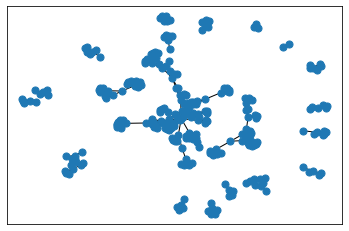

In [14]:
nx.draw_networkx(G, with_labels=False, node_size=50)

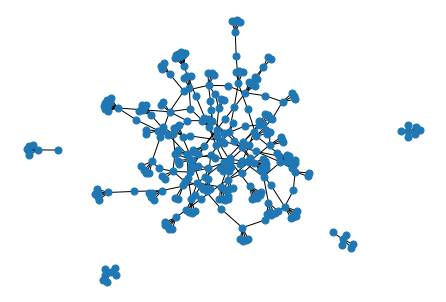

In [15]:
G = nx.from_pandas_edgelist(exter2017, 'ID', 'n_poste')
nx.draw(G, with_labels=False,node_size=50)

In [16]:
def draw_graph(networkx_graph, notebook = True, output_filename = 'graph.html', show_buttons = False, only_physics_buttons = False):
    from pyvis import network as net

    # make a pyvis network
    pyvis_graph = net.Network(notebook=notebook)

    # for each node and its attributes in the networkx graph
    for node,node_attrs in networkx_graph.nodes(data=True):
        pyvis_graph.add_node(str(node),**node_attrs)

    # for each edge and its attributes in the networkx graph
    for source,target,edge_attrs in networkx_graph.edges(data=True):
        # if value/width not specified directly, and weight is specified, set 'value' to 'weight'
        if not 'value' in edge_attrs and not 'width' in edge_attrs and 'weight' in edge_attrs:
        # place at key 'value' the weight of the edge
            edge_attrs['value'] = edge_attrs['weight']
        # add the edge
        pyvis_graph.add_edge(str(source), str(target), **edge_attrs)

    # turn buttons on
    if show_buttons:
        if only_physics_buttons:
            pyvis_graph.show_buttons(filter_=['physics'])
        else:
            pyvis_graph.show_buttons()

    # return and also save
    return pyvis_graph.show(output_filename)

In [17]:
draw_graph(G)

In [18]:
G2 = nx.from_pandas_edgelist(exter2017, 'n_poste', 'Name')
draw_graph(G2)

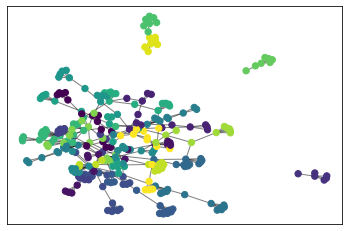

In [19]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [20]:
outer_merged = pd.merge(exter2017, exter2018, how="outer")
outer_merged2 = pd.merge(exter2019, exter2020, how="outer")

In [21]:
exter_df = pd.merge(outer_merged, outer_merged2, how="outer")
exter_df

,Name,n_poste,Level,Section,Role,status,year,institutions,ID,X,X.1,Id.author.no
0,Abdelkarim ZAID,4283,PR,70,NaN,externe,2017,ESPE LNF,82292477,NaN,NaN,NaN
1,Alain JEAN,544,MCF,70,NaN,externe,2017,ESPE Languedoc Roussillon,156891824,NaN,NaN,NaN
2,Alain VULBEAU,4061,PU,70,NaN,externe,2017,Paris NAnterre,28820649,NaN,NaN,NaN
3,Alain VULBEAU,4372,PR,70,NaN,externe,2017,Paris NAnterre,28820649,NaN,NaN,NaN
4,Anne-Claire Husser,4265,MCF,NaN,NaN,externe,2017,NaN,135608104,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Véronique BORDES,4648,PR ...,NaN,NaN,externe,2020,NaN,78455197,NaN,NaN,NaN
1271,VIEVILLE Thierry,37,DIRH,NaN,NaN,externe,2020,NaN,34241388,NaN,NaN,NaN
1272,Vivianne Durand-Guerrier,4551,PU,26,NaN,externe,2020,NaN,95203346,NaN,NaN,NaN
1273,VOISIN Dimitri,43,MCF ...,NaN,NaN,externe,2020,Université de Reims Champagne-Ardenne,137793901,NaN,NaN,NaN


In [22]:
G_exter = nx.Graph()
G_exter = nx.from_pandas_edgelist(exter_df, 'ID', 'n_poste')

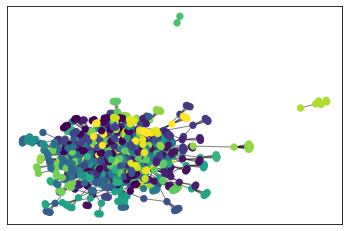

In [23]:
# compute the best partition
partition = community_louvain.best_partition(G_exter)

# draw the graph
pos = nx.spring_layout(G_exter)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_exter, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_exter, pos, alpha=0.5)
plt.show()

In [24]:
df_edge = pd.read_csv('edge_list.csv', encoding="latin-1")
df_edge.head()

,id,0,1
0,0,Â Philippe DESSUS,AgnÃ¨s PERRIN-DOUCEY
1,1,Â Philippe DESSUS,Brigitte LOUICHON
2,2,Â Philippe DESSUS,Catherine BRISSAUD
3,3,Â Philippe DESSUS,CÃ©cile NURRA
4,4,Â Philippe DESSUS,Christian DEPRET


In [25]:
G_edge = nx.Graph()
G_edge = nx.from_pandas_edgelist(df_edge, 'id', '0')
A = nx.adjacency_matrix(G_edge)

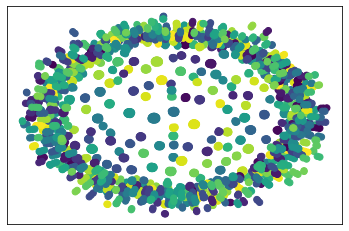

In [26]:
# compute the best partition
partition = community_louvain.best_partition(G_edge)

# draw the graph
pos = nx.spring_layout(G_edge)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_exter, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_edge, pos, alpha=0.5)
plt.show()